# Predicting the category of people who might be interested in purchasing the newly launched suv in the market


## Using Logistic Regression 

### Dataset : https://www.kaggle.com/datasets/iamaniket/suv-data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [17]:
df=pd.read_csv('/Users/aravindmohan/Desktop/TFL/Datasets/suv_data.csv')

# EDA

In [18]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [19]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


<AxesSubplot:xlabel='Purchased', ylabel='count'>

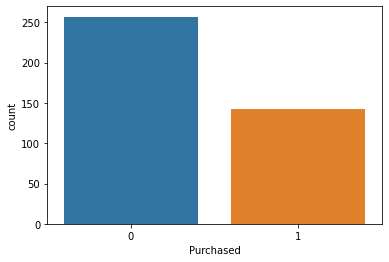

In [21]:
sns.countplot(x='Purchased', data = df)

<AxesSubplot:>

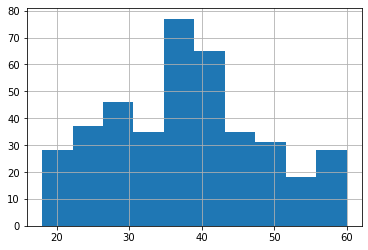

In [29]:
df["Age"].hist()

<AxesSubplot:ylabel='Frequency'>

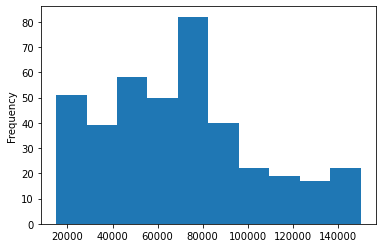

In [31]:
df['EstimatedSalary'].plot.hist()


<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

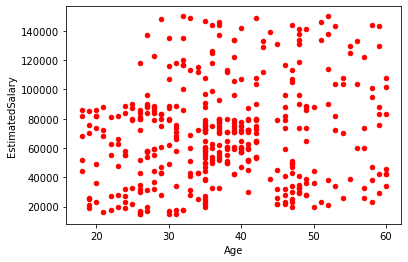

In [40]:
df.plot(kind='scatter',x='Age',y='EstimatedSalary',color='red')

In [42]:
df.corr()

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


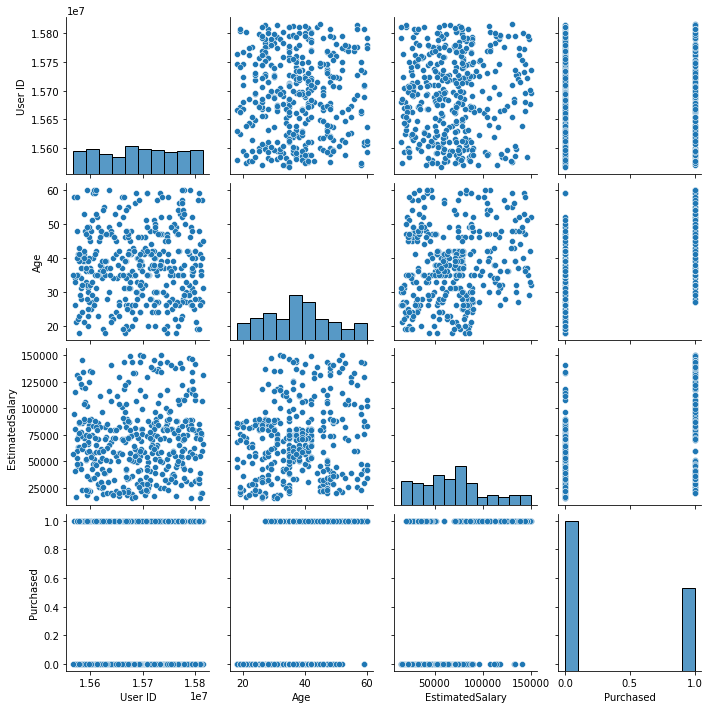

In [41]:
sns.pairplot(df)

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

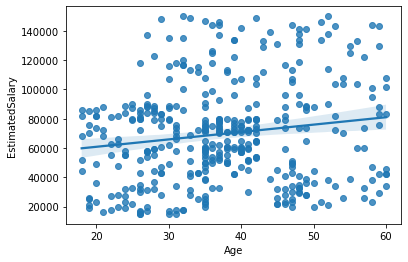

In [43]:
sns.regplot(x="Age", y="EstimatedSalary", data=df)

<AxesSubplot:xlabel='Purchased', ylabel='EstimatedSalary'>

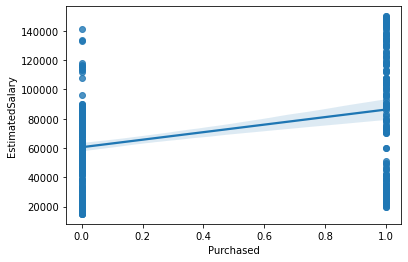

In [44]:
sns.regplot(x="Purchased", y="EstimatedSalary", data=df)

/Users/aravindmohan/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

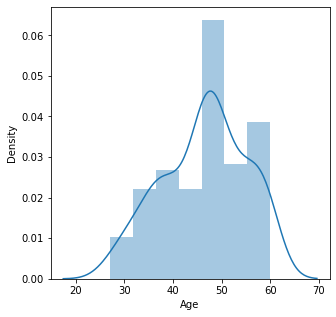

In [45]:
plt.figure(figsize = (5,5))
sns.distplot(df[df['Purchased']==1]['Age'])

/Users/aravindmohan/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

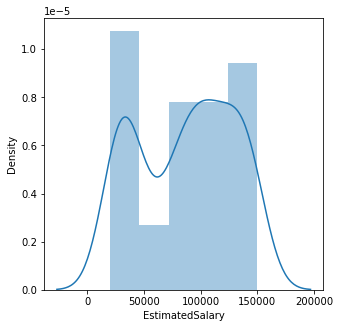

In [49]:
plt.figure(figsize = (5,5))
sns.distplot(df[df['Purchased']==1]['EstimatedSalary'])

<AxesSubplot:xlabel='Age', ylabel='Purchased'>

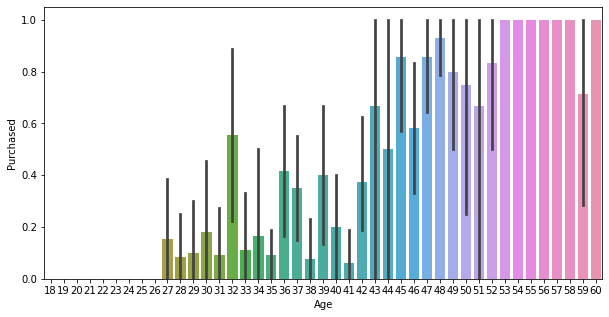

In [52]:
plt.figure(figsize = (10,5))
sns.barplot(x=df['Age'],y=df['Purchased'])

In [53]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [63]:
Gender = pd.get_dummies(df['Gender'], drop_first = True)
Gender.head(5)

,Male
0,1
1,1
2,0
3,0
4,1


In [64]:
df = pd.concat([df, Gender], axis = 1)

In [65]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased,Male
0,15624510,Male,19,19000,0,1
1,15810944,Male,35,20000,0,1
2,15668575,Female,26,43000,0,0
3,15603246,Female,27,57000,0,0
4,15804002,Male,19,76000,0,1
...,...,...,...,...,...,...
395,15691863,Female,46,41000,1,0
396,15706071,Male,51,23000,1,1
397,15654296,Female,50,20000,1,0
398,15755018,Male,36,33000,0,1


In [66]:
df.drop(['User ID', 'Gender'], axis = 1, inplace = True)
df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [68]:
X=df.drop('Purchased',axis=1)
y=df['Purchased']

In [71]:
X.head()

,Age,EstimatedSalary,Male
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1


In [72]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

## Logistic Regression

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)


In [79]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [85]:
model = LogisticRegression(solver = 'liblinear')


In [87]:
model.fit(X_train,y_train)


LogisticRegression(solver='liblinear')

In [88]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='liblinear')

In [89]:
predictions = model.predict(X_test)


In [91]:
print(classification_report(y_test, predictions))


              precision    recall  f1-score   support

           0       0.87      0.83      0.85        48
           1       0.76      0.81      0.79        32

    accuracy                           0.82        80
   macro avg       0.82      0.82      0.82        80
weighted avg       0.83      0.82      0.83        80



In [92]:
print("Confusion Matrix: \n",confusion_matrix(y_test, predictions))


Confusion Matrix: 
 [[40  8]
 [ 6 26]]


In [93]:
print("Accuracy: ",accuracy_score(y_test, predictions))


Accuracy:  0.825
